<a href="https://colab.research.google.com/github/BrayannQuevedoBenito/Parcial_1/blob/main/Parcial_1_29_sept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

“Al entregar la solución de este parcial, yo, Brayann Quevedo con código 201517094 me comprometo a no
conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre
aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o
intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Soy
consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este
parcial”.

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas_profiling import ProfileReport

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [3]:
!pip install --upgrade pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
history=pd.read_csv('https://raw.githubusercontent.com/BrayannQuevedoBenito/Parcial_1/main/losalpes_history.csv',sep=',').drop_duplicates()

In [78]:
history.loc[history["cancellation_policy"] == "strict", "cancellation_policy"] = 1
history.loc[history["cancellation_policy"] == "flexible", "cancellation_policy"] = 2
history.loc[history["cancellation_policy"] == "moderate", "cancellation_policy"] = 3

In [79]:
history.loc[history["room type"] == "Entire home/apt", "room type"] = 1
history.loc[history["room type"] == "Hotel room", "room type"] = 2
history.loc[history["room type"] == "Private room", "room type"] = 3
history.loc[history["room type"] == "Shared room", "room type"] = 4

In [80]:
history.loc[history["instant_bookable"] == "True", "instant_bookable"] = 1
history.loc[history["instant_bookable"] == "False", "instant_bookable"] = 0

In [81]:
history

id neighbourhood group       neighbourhood       lat      long  \
0       48540006           Manhattan      Hell's Kitchen  40.76212 -73.98820   
1       35079903           Manhattan             Midtown  40.74623 -73.98499   
2       50681273           Manhattan     Upper West Side  40.78859 -73.97568   
3       13039267           Manhattan  Financial District  40.70817 -74.00511   
4        8998640           Manhattan     Lower East Side  40.72130 -73.98900   
...          ...                 ...                 ...       ...       ...   
102078   4462048            Brooklyn    Prospect Heights  40.68137 -73.97081   
102079  31315978            Brooklyn        Williamsburg  40.70951 -73.96443   
102080  43430679              Queens            Rosedale  40.67104 -73.73006   
102081   1476314           Manhattan     Upper West Side  40.78012 -73.98439   
102082   9725467              Queens    Long Island City  40.74657 -73.94555   

              country instant_bookable cancellation_policy room type  \
0       United States             True                   1         1   
1       United States             True                   2         2   
2       United States            False                   2         3   
3       United States            False                   1         3   
4       United States             True                   3         1   
...               ...              ...                 ...       ...   
102078  United States            False                   2         1   
102079  United States            False                   1         3   
102080  United States             True                   2         3   
102081  United States             True                   3         1   
102082  United States             True                   1         1   

        construction year   price service fee  minimum nights  \
0                  2011.0   $ 851       $ 170             4.0   
1                  2021.0   $ 466        $ 93             1.0   
2                  2004.0   $ 874       $ 175            14.0   
3                  2012.0   $ 813       $ 163             1.0   
4                  2007.0   $ 326        $ 65             4.0   
...                   ...     ...         ...             ...   
102078             2014.0   $ 428        $ 86             3.0   
102079             2004.0  $ 1,14       $ 227             2.0   
102080             2018.0    $ 98        $ 20             2.0   
102081             2007.0   $ 316        $ 63             1.0   
102082             2013.0   $ 628       $ 126             5.0   

        availability 365  number of reviews  review rate number  
0                  199.0              112.0                 1.0  
1                  161.0               13.0                 5.0  
2                    0.0                1.0                 2.0  
3                    0.0                5.0                 3.0  
4                  301.0                9.0                 3.0  
...                  ...                ...                 ...  
102078             142.0               27.0                 2.0  
102079             343.0                7.0                 2.0  
102080             355.0               12.0                 1.0  
102081             302.0                0.0                 NaN  
102082             193.0                1.0                 3.0  

[101547 rows x 16 columns]

In [82]:
history.shape

(101547, 16)

In [83]:
history.dtypes

id                       int64
neighbourhood group     object
neighbourhood           object
lat                    float64
long                   float64
country                 object
instant_bookable        object
cancellation_policy     object
room type               object
construction year      float64
price                   object
service fee             object
minimum nights         float64
availability 365       float64
number of reviews      float64
review rate number     float64
dtype: object

In [84]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', '.'))
    return(x)

In [85]:
history['price'] = history['price'].apply(clean_currency).astype('float')

In [86]:
history['service fee'] = history['service fee'].apply(clean_currency).astype('float')

In [87]:
history = history[history['construction year'].notna()]

In [88]:
history.shape

(100749, 16)

In [89]:
history['construction year'] = history['construction year'].astype(np.int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
history.groupby(['room type']).count()

id  neighbourhood group  neighbourhood    lat   long  country  \
room type                                                                     
1          52799                52791          52788  52797  52797    52514   
2            113                  113            113    113    113      110   
3          45672                45656          45667  45667  45667    45464   
4           2165                 2165           2165   2165   2165     2145   

           instant_bookable  cancellation_policy  construction year  price  \
room type                                                                    
1                     52741                52754              52799  52669   
2                       113                  113                113    113   
3                     45636                45652              45672  45567   
4                      2163                 2163               2165   2157   

           service fee  minimum nights  availability 365  number of reviews  \
room type                                                                     
1                52673           52592             52600              52725   
2                  111             111               113                113   
3                45538           45501             45461              45568   
4                 2161            2162              2150               2165   

           review rate number  
room type                      
1                       52653  
2                         113  
3                       45522  
4                        2158

In [91]:
history['construction year'].apply(type).value_counts()

<class 'int'>    100749
Name: construction year, dtype: int64

In [92]:
history[['number of reviews']].std() 

number of reviews    49.424365
dtype: float64

In [93]:
history[['number of reviews']].mean() 

number of reviews    27.384385
dtype: float64

In [94]:
history[['review rate number']].mean() 

review rate number    3.279394
dtype: float64

In [95]:
history['number of reviews']=history['number of reviews'].fillna(32.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
history=history.dropna()

In [97]:
history.isnull().sum()

id                     0
neighbourhood group    0
neighbourhood          0
lat                    0
long                   0
country                0
instant_bookable       0
cancellation_policy    0
room type              0
construction year      0
price                  0
service fee            0
minimum nights         0
availability 365       0
number of reviews      0
review rate number     0
dtype: int64

In [98]:
cities=["Bronx","Brooklyn","Manhattan","Queens","Staten Island"]

In [99]:
history[history['neighbourhood group'].isnull()]

Empty DataFrame
Columns: [id, neighbourhood group, neighbourhood, lat, long, country, instant_bookable, cancellation_policy, room type, construction year, price, service fee, minimum nights, availability 365, number of reviews, review rate number]
Index: []

In [100]:
history = history[history['neighbourhood group'].notna()]

In [101]:
history.loc[~history["neighbourhood group"].isin(cities), "neighbourhood group"].unique()

array(['Quens', 'Manattan', 'Broolkyn', 'Manhatan', 'brookln'],
      dtype=object)

In [102]:
history["neighbourhood group"].replace({"Broolkyn": "Brooklyn", "Manhatan": "Manhattan","Manattan":"Manhattan","Quens":"Queens"}, inplace=True)

In [103]:
history.groupby(['neighbourhood group']).count()

id  neighbourhood    lat   long  country  \
neighbourhood group                                                
Bronx                 2577           2577   2577   2577     2577   
Brooklyn             40325          40325  40325  40325    40325   
Manhattan            42177          42177  42177  42177    42177   
Queens               12671          12671  12671  12671    12671   
Staten Island          912            912    912    912      912   
brookln                  1              1      1      1        1   

                     instant_bookable  cancellation_policy  room type  \
neighbourhood group                                                     
Bronx                            2577                 2577       2577   
Brooklyn                        40325                40325      40325   
Manhattan                       42177                42177      42177   
Queens                          12671                12671      12671   
Staten Island                     912                  912        912   
brookln                             1                    1          1   

                     construction year  price  service fee  minimum nights  \
neighbourhood group                                                          
Bronx                             2577   2577         2577            2577   
Brooklyn                         40325  40325        40325           40325   
Manhattan                        42177  42177        42177           42177   
Queens                           12671  12671        12671           12671   
Staten Island                      912    912          912             912   
brookln                              1      1            1               1   

                     availability 365  number of reviews  review rate number  
neighbourhood group                                                           
Bronx                            2577               2577                2577  
Brooklyn                        40325              40325               40325  
Manhattan                       42177              42177               42177  
Queens                          12671              12671               12671  
Staten Island                     912                912                 912  
brookln                             1                  1                   1

In [104]:
history=history[history['neighbourhood group'].isin(cities)]

In [105]:
history.loc[history["neighbourhood group"] == "Bronx", "neighbourhood group"] = 1
history.loc[history["neighbourhood group"] == "Brooklyn", "neighbourhood group"] = 2
history.loc[history["neighbourhood group"] == "Manhattan", "neighbourhood group"] = 3
history.loc[history["neighbourhood group"] == "Queens", "neighbourhood group"] = 4
history.loc[history["neighbourhood group"] == "Staten Island", "neighbourhood group"] = 5

In [106]:
history.groupby(['instant_bookable']).count()

id  neighbourhood group  neighbourhood    lat   long  \
instant_bookable                                                            
False             49551                49551          49551  49551  49551   
True              49111                49111          49111  49111  49111   

                  country  cancellation_policy  room type  construction year  \
instant_bookable                                                               
False               49551                49551      49551              49551   
True                49111                49111      49111              49111   

                  price  service fee  minimum nights  availability 365  \
instant_bookable                                                         
False             49551        49551           49551             49551   
True              49111        49111           49111             49111   

                  number of reviews  review rate number  
instant_bookable                                         
False                         49551               49551  
True                          49111               49111

In [107]:
history["country"].replace({"United States of America": "United States"}, inplace=True)

In [108]:
history['number of reviews'].mean()

27.273337252437614

In [109]:
history.groupby(['number of reviews']).count()

id  neighbourhood group  neighbourhood    lat   long  \
number of reviews                                                            
0.0                15150                15150          15150  15150  15150   
1.0                10059                10059          10059  10059  10059   
2.0                 6935                 6935           6935   6935   6935   
3.0                 5180                 5180           5180   5180   5180   
4.0                 4001                 4001           4001   4001   4001   
...                  ...                  ...            ...    ...    ...   
849.0                  1                    1              1      1      1   
884.0                  1                    1              1      1      1   
966.0                  1                    1              1      1      1   
1010.0                 1                    1              1      1      1   
1024.0                 1                    1              1      1      1   

                   country  instant_bookable  cancellation_policy  room type  \
number of reviews                                                              
0.0                  15150             15150                15150      15150   
1.0                  10059             10059                10059      10059   
2.0                   6935              6935                 6935       6935   
3.0                   5180              5180                 5180       5180   
4.0                   4001              4001                 4001       4001   
...                    ...               ...                  ...        ...   
849.0                    1                 1                    1          1   
884.0                    1                 1                    1          1   
966.0                    1                 1                    1          1   
1010.0                   1                 1                    1          1   
1024.0                   1                 1                    1          1   

                   construction year  price  service fee  minimum nights  \
number of reviews                                                          
0.0                            15150  15150        15150           15150   
1.0                            10059  10059        10059           10059   
2.0                             6935   6935         6935            6935   
3.0                             5180   5180         5180            5180   
4.0                             4001   4001         4001            4001   
...                              ...    ...          ...             ...   
849.0                              1      1            1               1   
884.0                              1      1            1               1   
966.0                              1      1            1               1   
1010.0                             1      1            1               1   
1024.0                             1      1            1               1   

                   availability 365  review rate number  
number of reviews                                        
0.0                           15150               15150  
1.0                           10059               10059  
2.0                            6935                6935  
3.0                            5180                5180  
4.0                            4001                4001  
...                             ...                 ...  
849.0                             1                   1  
884.0                             1                   1  
966.0                             1                   1  
1010.0                            1                   1  
1024.0                            1                   1  

[471 rows x 15 columns]

#Localizamos el valor átipico para eliminarlo, este valor se localizó utilizando un groupby

In [110]:
history[history['price']==254000]

id neighbourhood group neighbourhood       lat      long  \
59645  17111375                   3      Kips Bay  40.74351 -73.97857   

             country instant_bookable cancellation_policy room type  \
59645  United States            False                   1         4   

       construction year     price  service fee  minimum nights  \
59645               2004  254000.0         51.0             1.0   

       availability 365  number of reviews  review rate number  
59645             324.0                4.0                 5.0

In [111]:
history.drop(59645, inplace=True)

In [112]:
history=history[history['price']>0]

In [113]:
history=history[history['availability 365']>0]

In [114]:
history=history[history['availability 365']<=365]

In [115]:
history=history[history['construction year']>=2000]

###Calidad de datos y limpieza
Se realiza la limpieza de datos, dropeando los duplicados (Se tienen 536 filas iguales) ya que no poseen ningun sentido y de igual manera llenamos el campo de construction_year con el promedio de los años en el cual han sido construidos, se realiza el respectivo reemplazo del signo $ en las columnas price y service fee convirtiendolos en float para poder analizarlos

Tenemos nuestra variable objetivos ('number of reviews') el cual lleno sus vacios con la media del numero de reviews, ya que no se quisiera eliminar filas por vacios en este campo

De igual manera se realiza una agrupacion por nombre del vecindario para poder saber que nombres estaban mal y poder reemplazarlos, por ultimo se revisa la columna country y se deja un solo nombre del país.

De igual manera se toman los valores del precio mayores a 0 pues no tiene sentido un precio negativo

De igual manera se dropean los datos NA o vacíos ya que son pocos los datos y para la columna de disponibilidad al año se toman valores entre 0 y 365 días. 

Se categorizan las variables de room type, grupo vecindario para usarlas después en el modelo de predicción, se descarta el vecidario especifico, pues con el grupo de vecindario ya se obtiene la informacion

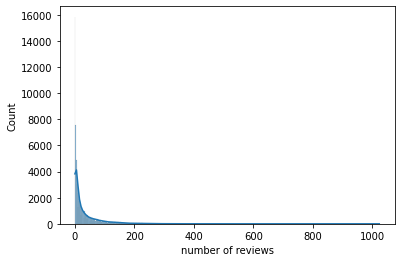

In [116]:
sns.histplot(data=history, x="number of reviews", kde=True)

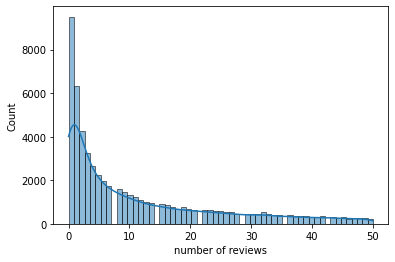

In [117]:
sns.histplot(data=history[history['number of reviews']<=50], x="number of reviews", kde=True)


##Exploracion de datos
Se grafica la variable objetivo con el fin de analizar que comportamiento posee, como se observa en la primera grafica, se alcanza a notar que el comportamiento de esta variable es no tiene un distribución normal, lo podemos tomar como una distribución logaritmica


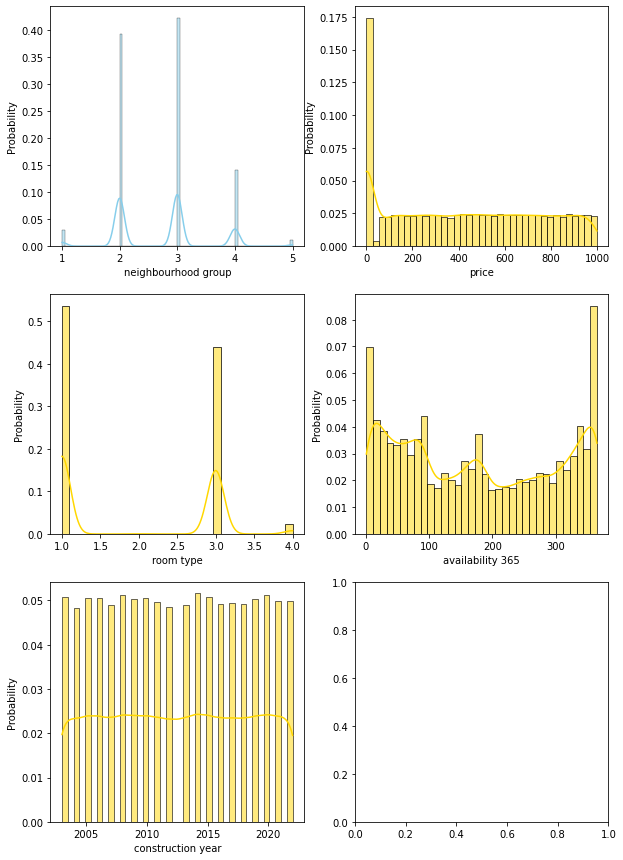

In [118]:
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

sns.histplot(data=history, x="neighbourhood group", kde=True, color="skyblue",stat='probability', ax=axs[0, 0])
sns.histplot(data=history, x="room type", kde=True, color="gold",stat='probability', ax=axs[1, 0])
sns.histplot(data=history, x="price", kde=True, color="gold",stat='probability', ax=axs[0, 1])
sns.histplot(data=history, x="availability 365", kde=True, color="gold",stat='probability', ax=axs[1, 1])
sns.histplot(data=history, x="construction year", kde=True, color="gold",stat='probability', ax=axs[2, 0])



1.   La mayoría de rentas se realiza en Manhathan y Brooklyn
2.   Para el precio en este dataset se encuentran muchos valores cercanos a cero el cual es lo mas probable de rentar, sin embargo, si miramos sin este valor, la probabilidad de renta con el resto de precios es similar
3. Se renta muchos apartamentos completos y muchos cuartos privados, se podrían decir que este serían favoritos
4. La cantidad de días disponibles al año afecta la probabilidad de renta
5. De acuerdo a la grafica se deduce que el año de construcción no altera la probabilidad que se rente algún tipo de servicio con Airbnb



In [119]:
profile = ProfileReport(history)

In [120]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Del perfilamiento anterior, podemos observar que no hay variable alguna en el dataset con una correlación alta con el numero de comentarios/reviews por lo tanto para el entrenamiento del modelo predictivo vamos a utilizar variables como precio, impuesto de servicio, room type, disponibilidad al año y grupo de vecindario

In [121]:
history['number of reviews'].describe(percentiles = [.25, .5, .75, .95, .99])

count    72670.000000
mean        32.344613
std         53.194331
min          0.000000
25%          2.000000
50%         10.000000
75%         40.000000
95%        136.000000
99%        246.000000
max       1024.000000
Name: number of reviews, dtype: float64

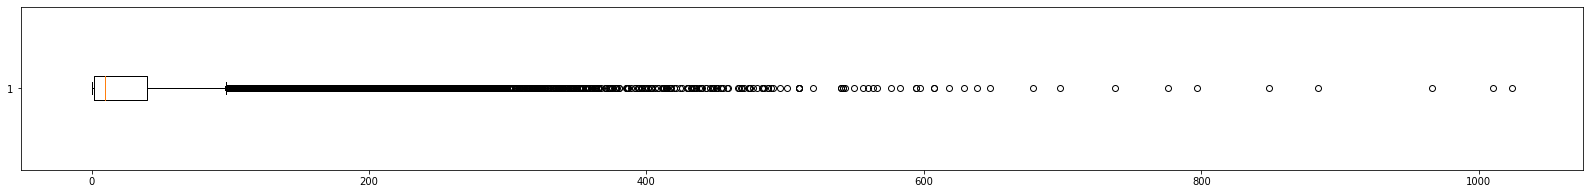

In [122]:
plt.figure(figsize = (28, 3))
plt.boxplot(history['number of reviews'], vert = False)
plt.show()

Quitamos outliers que se encuentran en el dataset

In [123]:
history_no_outliers = history.loc[history['number of reviews'] <= history['number of reviews'].quantile(.90)]

In [124]:
history_no_outliers.shape

(65465, 16)

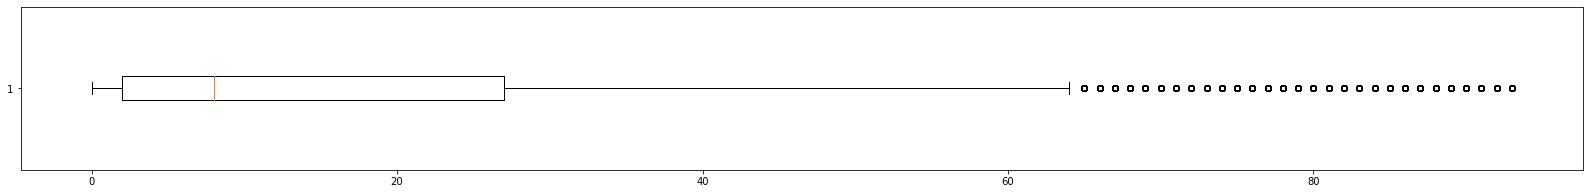

In [125]:

plt.figure(figsize = (28, 3))
plt.boxplot(history_no_outliers['number of reviews'], vert = False)
plt.show()

In [126]:
features=['cancellation_policy','room type','price','availability 365','neighbourhood group','service fee']

Confirmamos la correlación entre las variables

In [127]:
history_no_outliers[features + ['number of reviews']].corr()

price  availability 365  service fee  number of reviews
price              1.000000         -0.009619     0.173904           0.000014
availability 365  -0.009619          1.000000    -0.002496          -0.064778
service fee        0.173904         -0.002496     1.000000           0.006251
number of reviews  0.000014         -0.064778     0.006251           1.000000

In [128]:
X = history_no_outliers[features]
Y = history_no_outliers['number of reviews']

Fijamos las variables para entrenar y probar el modelo predictivo

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [130]:
X_train.shape

(52372, 6)

In [131]:
X_test.shape

(13093, 6)

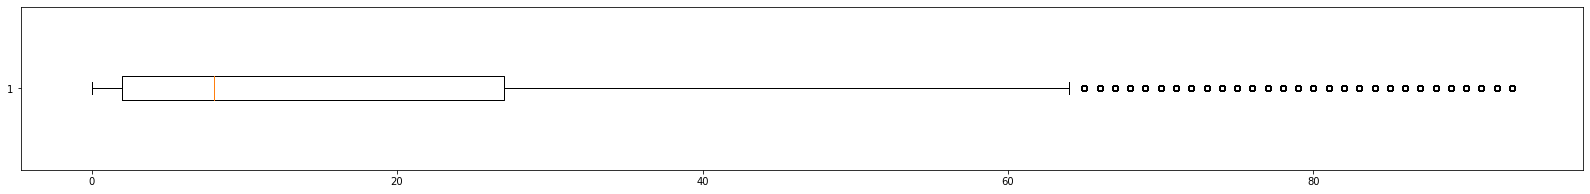

In [132]:
plt.figure(figsize = (28, 3))
plt.boxplot(Y_train, vert = False)
plt.show()

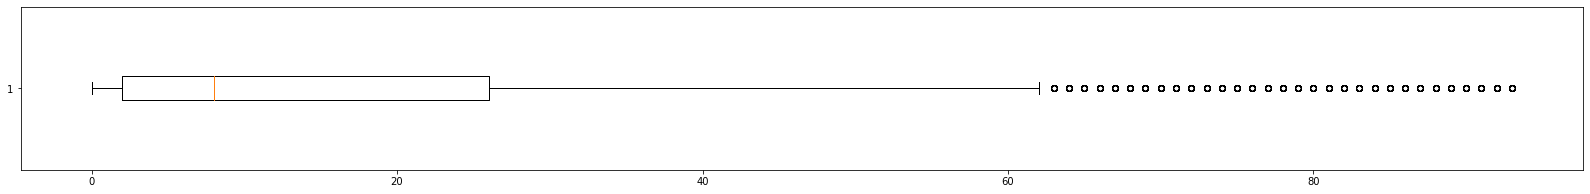

In [133]:
plt.figure(figsize = (28, 3))
plt.boxplot(Y_test, vert = False)
plt.show()

El modelo predictivo tiene diferentes escalas por lo tanto estandarizamos

In [134]:
scaler = StandardScaler()

###MODELOS Predictivos

In [135]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [136]:
regr = LinearRegression()
regr.fit(X_train_scaled, Y_train)

LinearRegression()

Se calculan coeficientes e interceptos de la regresion

In [137]:
regr.coef_

array([ 0.12195471,  0.20733646, -0.034975  , -1.47060806, -0.17278148,
        0.0655004 ])

In [138]:
regr.intercept_

18.282192774765143

In [139]:
preds_train = regr.predict(X_train_scaled)
preds_test = regr.predict(X_test_scaled)

In [165]:
print('R2 Test: {}'.format(r2_score(Y_test, preds_test)))

R2 Test: 0.0038392776507035764


In [166]:
print('R2 Test: {}'.format(r2_score(Y_train, preds_train)))

R2 Test: 0.004342390888695702


#Obtenemos el valor del error medio absoluto que significa la distancia que hay entre el valor predictivo y el valor medido

In [140]:
mean_absolute_error(Y_train, preds_train), mean_absolute_error(Y_test, preds_test)

(17.80305556985182, 17.749637047803436)

In [141]:
np.sqrt(mean_squared_error(Y_train, preds_train)), np.sqrt(mean_squared_error(Y_test, preds_test))

(22.793442897162144, 22.75981780442496)

###Análisis de Error

In [142]:
(Y_test - preds_test).describe(percentiles = [.25, .5, .75, .95, .99])

count    13093.000000
mean        -0.259537
std         22.759207
min        -21.031191
25%        -16.101660
50%        -10.384442
75%          7.990646
95%         53.252254
99%         70.554347
max         77.281101
Name: number of reviews, dtype: float64

In [143]:
worst_condition = np.where((Y_test - preds_test) > 3, True, False)

In [144]:
worst_cases = pd.concat([
    X_test.loc[worst_condition],
    Y_test.loc[worst_condition]
], axis = 1).reset_index(drop = True)

In [145]:
worst_cases['predictions'] = pd.Series(preds_test).loc[worst_condition].reset_index(drop = True)

In [146]:
worst_cases.shape

(3841, 8)

#Encontramos los casos donde la prediction del modelo falla

In [147]:
worst_cases

cancellation_policy room type   price  availability 365  \
0                      3         3  314.00               9.0   
1                      1         1  395.00             137.0   
2                      3         3  729.00              38.0   
3                      2         4  814.00              60.0   
4                      1         3  719.00              11.0   
...                  ...       ...     ...               ...   
3836                   1         1  625.00             333.0   
3837                   2         1    1.01              52.0   
3838                   2         1  322.00              47.0   
3839                   3         1  830.00             238.0   
3840                   2         3   68.00             348.0   

     neighbourhood group  service fee  number of reviews  predictions  
0                      2         63.0               24.0    20.769936  
1                      2         79.0               54.0    18.535671  
2                      4        146.0               28.0    20.015233  
3                      3        163.0               37.0    20.030018  
4                      2        144.0               33.0    20.482597  
...                  ...          ...                ...          ...  
3836                   3        125.0               28.0    15.974984  
3837                   2        202.0               27.0    19.873336  
3838                   3         64.0               92.0    19.540938  
3839                   3        166.0               31.0    17.435413  
3840                   2         14.0               86.0    16.517639  

[3841 rows x 8 columns]

###Regresion Polinomial (Modelo polinomial 2 y 3 grados)


In [148]:
poly_features= PolynomialFeatures(degree=2,include_bias=False)


In [149]:
X_poly_train=poly_features.fit_transform(X_train_scaled)


In [150]:
X_poly_test=poly_features.fit_transform(X_test_scaled)


In [151]:
ridge_reg=Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X_poly_train,Y_train)
train_x_predict=ridge_reg.predict(X_poly_train)
test_x_predict=ridge_reg.predict(X_poly_test)

In [152]:
mean_absolute_error(Y_train, train_x_predict), mean_absolute_error(Y_test, test_x_predict)

(17.602904350741444, 17.546925719334453)

In [153]:
#Validacion del modelo 2 grados
R2 = format(r2_score(Y_train, train_x_predict))
print('R2 Entrenamiento: {}'.format(r2_score(Y_train, train_x_predict)))

R2 Entrenamiento: 0.01857549026131977


In [164]:
R2 = format(r2_score(Y_test, test_x_predict))
print('R2 Test: {}'.format(r2_score(Y_test, test_x_predict)))

R2 Test: 0.017658146821480036


In [155]:
#Modelo

poly = PolynomialFeatures(degree = 3)
poly_X = poly.fit_transform(history_no_outliers[features])

In [156]:
poly_X_train, poly_X_test, poly_Y_train, poly_Y_test = train_test_split(poly_X, Y, test_size = 0.25, random_state = 0)

polynomial_model = LinearRegression().fit(poly_X_train, poly_Y_train)

In [157]:
#Entrenamiento
Y_pred_train = polynomial_model.predict(poly_X_train)
print("MSE: %.2f" % mean_squared_error(poly_Y_train, Y_pred_train, squared =True))
print("RMSE: %.2f" % mean_squared_error(poly_Y_train, Y_pred_train, squared = False))
print("MAE: %.2f" % mean_absolute_error(poly_Y_train, Y_pred_train))
R2 = format(r2_score(poly_Y_train, Y_pred_train))
print('R2 Entrenamiento: {}'.format(r2_score(poly_Y_train, Y_pred_train)))




MSE: 506.71
RMSE: 22.51
MAE: 17.47
R2 Entrenamiento: 0.027763240407779


In [158]:
#Test
Y_pred_test = polynomial_model.predict(poly_X_test)
print("MSE: %.2f" % mean_squared_error(poly_Y_test, Y_pred_test, squared =True))
print("RMSE: %.2f" % mean_squared_error(poly_Y_test, Y_pred_test, squared = False))
print("MAE: %.2f" % mean_absolute_error(poly_Y_test, Y_pred_test))
R2 = r2_score(poly_Y_test, Y_pred_test)
print('R2 Test: {}'.format(r2_score(poly_Y_test, Y_pred_test)))

MSE: 508.65
RMSE: 22.55
MAE: 17.47
R2 Test: 0.026054906199140748


In [160]:
#Modelo con 4 grados

poly4 = PolynomialFeatures(degree = 4)
poly_X4 = poly.fit_transform(history_no_outliers[features])

In [161]:
poly_X4_train, poly_X4_test, poly_Y4_train, poly_Y4_test = train_test_split(poly_X4, Y, test_size = 0.25, random_state = 0)

polynomial_model = LinearRegression().fit(poly_X4_train, poly_Y4_train)

In [162]:
#Entrenamiento
Y4_pred_train = polynomial_model.predict(poly_X4_train)
print("MSE: %.2f" % mean_squared_error(poly_Y4_train, Y4_pred_train, squared =True))
print("RMSE: %.2f" % mean_squared_error(poly_Y4_train, Y4_pred_train, squared = False))
print("MAE: %.2f" % mean_absolute_error(poly_Y4_train, Y4_pred_train))
R2 = format(r2_score(poly_Y4_train, Y4_pred_train))
print('R2 Entrenamiento: {}'.format(r2_score(poly_Y4_train, Y4_pred_train)))

MSE: 506.71
RMSE: 22.51
MAE: 17.47
R2 Entrenamiento: 0.027763240407779


In [163]:
#Test
Y4_pred_test = polynomial_model.predict(poly_X4_test)
print("MSE: %.2f" % mean_squared_error(poly_Y4_test, Y4_pred_test, squared =True))
print("RMSE: %.2f" % mean_squared_error(poly_Y4_test, Y4_pred_test, squared = False))
print("MAE: %.2f" % mean_absolute_error(poly_Y4_test, Y4_pred_test))
R2 = r2_score(poly_Y4_test, Y4_pred_test)
print('R2 Test: {}'.format(r2_score(poly_Y4_test, Y4_pred_test)))

MSE: 508.65
RMSE: 22.55
MAE: 17.47
R2 Test: 0.026054906199140748


###Conclusiones y recomendaciones
No existe una variable totalmente correlacionada con la cantidad de reviews que recibe el apartamento/hotel/habitacion.
De igual manera se realizan (4 modelos predictivos)
1. Regresion Lineal
2. Regresion Polinomial (2 grados (Ridge regresion), 3 grados (Linear regression), 4 grados/Linear regression))
El mejor modelo que se adapta es el modelo de 3 y 4 grados puesto que su R2 es mayor a los otros, sin embargo, puede que el modelo esté teniendo algo de overfitting, ya que está dando mejor con el entrenamiento que con la prueba

Por lo tanto la predicción se hará con alguno de estos modelos.

Ahora bien, en el profiling podemos observar los datos de las variables de manera detallada y con sus respectivas correlaciones.

In [168]:
poly3 = PolynomialFeatures(degree = 3)
poly_Variables = poly.fit_transform(history_no_outliers[features])


Y_prediccion = polynomial_model.predict(poly_Variables)
print("La cantidad de reviews que tendrá vale: %.2f" % Y_prediccion)

TypeError: ignored